<a href="https://colab.research.google.com/github/porkens/myTestRepo/blob/main/Zadanie3_Noga_Bart%C5%82omiej_MLRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

In [ ]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's1': 0.5},
        'a1': {'s0': 1},
    },
    's1': {
        'a0': {'s0': 0.95, 's1': 0.05},
        'a1': {'s1': 1},
        'a2': {'s0': 1}
    },
}
rewards = {
    's0': {'a0': {'s0': +5, 's1': +5},
          'a1': {'s0': +1}},
    's1': {'a0': {'s0': -100, 's1': +5},
          'a1': {'s1': +1},
          'a2': {'s0': +0.5}
          },
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [ ]:
mdp.reset()

's0'

In [ ]:
next_state, reward, done, info = mdp.step('a1')
print(next_state, reward, done, info)

s0 1 False {}


In [ ]:
mdp.get_all_states()

('s0', 's1')

In [ ]:
mdp.get_possible_actions('s1')

('a0', 'a1', 'a2')

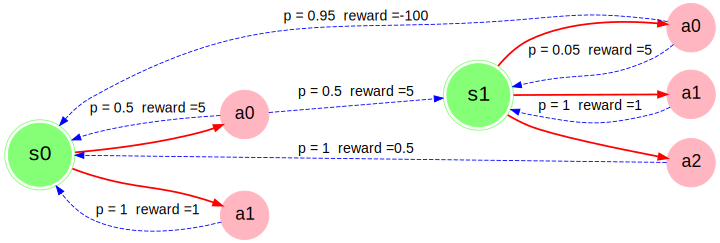

In [ ]:
from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [ ]:
import random
state = mdp.reset()

for t in range(200):

  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation

  print(t, observation, reward, done)

0 s1 5 False
1 s1 1 False
2 s0 -100 False
3 s0 1 False
4 s0 1 False
5 s0 1 False
6 s1 5 False
7 s1 1 False
8 s1 1 False
9 s1 1 False
10 s1 1 False
11 s0 0.5 False
12 s0 1 False
13 s0 5 False
14 s0 1 False
15 s0 1 False
16 s0 5 False
17 s0 1 False
18 s1 5 False
19 s1 1 False
20 s0 -100 False
21 s1 5 False
22 s0 0.5 False
23 s0 1 False
24 s0 5 False
25 s0 1 False
26 s1 5 False
27 s0 0.5 False
28 s0 5 False
29 s1 5 False
30 s1 1 False
31 s1 1 False
32 s0 -100 False
33 s0 1 False
34 s0 5 False
35 s0 1 False
36 s0 1 False
37 s0 5 False
38 s0 1 False
39 s1 5 False
40 s0 0.5 False
41 s0 1 False
42 s1 5 False
43 s1 1 False
44 s0 0.5 False
45 s0 5 False
46 s0 1 False
47 s0 1 False
48 s1 5 False
49 s0 0.5 False
50 s0 5 False
51 s0 1 False
52 s0 1 False
53 s1 5 False
54 s0 -100 False
55 s0 5 False
56 s0 1 False
57 s0 1 False
58 s0 1 False
59 s0 1 False
60 s0 5 False
61 s0 5 False
62 s0 5 False
63 s0 1 False
64 s0 1 False
65 s1 5 False
66 s1 1 False
67 s1 1 False
68 s0 0.5 False
69 s0 1 False
70 s

In [ ]:
def get_action_value(mdp, state_values, state, action, gamma):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):
    
    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward + (gamma * state_values[next_state]))

  return Q

In [ ]:
def get_new_state_value(mdp, state_values, state, gamma):
  
  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)])

In [ ]:
gamma = 0.98
num_iter = 94
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 5.0 {'s0': 0, 's1': 0}
1 4.4 {'s0': 5.0, 's1': 1.0}
2 3.5965999999999996 {'s0': 7.94, 's1': 5.4}
3 3.524668 {'s0': 11.5366, 's1': 8.2812}
4 3.2824071000000004 {'s0': 14.710722, 's1': 11.805868}
5 3.216758958 {'s0': 17.9931291, 's1': 14.91650756}
6 3.1111823924860005 {'s0': 21.1257219634, 's1': 18.133266518}
7 3.0489587446362805 {'s0': 24.236904355886, 's1': 21.203207524132}
8 2.9780775128799597 {'s0': 27.26565482120882, 's1': 24.25216626876828}
9 2.9185159626223616 {'s0': 30.24373233408878, 's1': 27.220341724784642}
10 2.857768159516965 {'s0': 33.15739628884798, 's1': 30.138857687407004}
11 2.800612796326625 {'s0': 36.01516444836494, 's1': 32.994248363071016}
12 2.7440297065270016 {'s0': 38.814612277603615, 's1': 35.79486115939764}
13 2.689149112396457 {'s0': 41.55864198413062, 's1': 38.538320032051544}
14 2.6352290729355943 {'s0': 44.24751138792926, 's1': 41.227469144448}
15 2.5825244914768817 {'s0': 46.88274046086485, 's1': 43.86256116017067}
16 2.5308410942105297 {'s0': 49.4651977

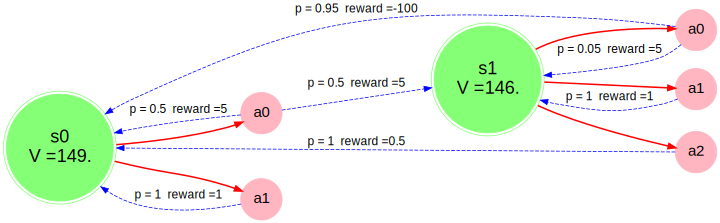

In [ ]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))

In [ ]:
def get_optimal_action(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return None
    
    action_values = [get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)]
    argmax_index = np.argmax(action_values)
    return mdp.get_possible_actions(state)[argmax_index]

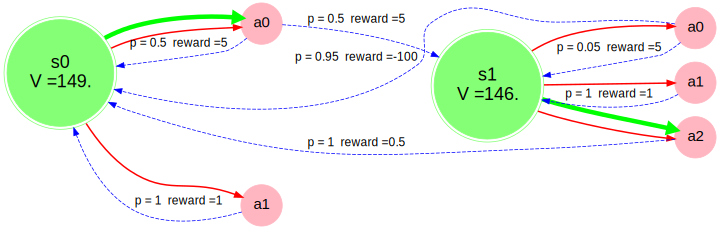

In [ ]:
if has_graphviz:
    from mdp import plot_graph_optimal_strategy_and_state_values
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))

In [ ]:
s = mdp.reset()
mdp.render()

for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    s, r, done, _ = mdp.step(a)
    print(t, a, r)
    mdp.render()
    
    if done:
        break

Currently at s0
0 a0 5
Currently at s0
1 a0 5
Currently at s0
2 a0 5
Currently at s1
3 a2 0.5
Currently at s0
4 a0 5
Currently at s0
5 a0 5
Currently at s1
6 a2 0.5
Currently at s0
7 a0 5
Currently at s0
8 a0 5
Currently at s1
9 a2 0.5
Currently at s0
10 a0 5
Currently at s0
11 a0 5
Currently at s0
12 a0 5
Currently at s1
13 a2 0.5
Currently at s0
14 a0 5
Currently at s1
15 a2 0.5
Currently at s0
16 a0 5
Currently at s1
17 a2 0.5
Currently at s0
18 a0 5
Currently at s0
19 a0 5
Currently at s1
20 a2 0.5
Currently at s0
21 a0 5
Currently at s0
22 a0 5
Currently at s1
23 a2 0.5
Currently at s0
24 a0 5
Currently at s1
25 a2 0.5
Currently at s0
26 a0 5
Currently at s0
27 a0 5
Currently at s0
28 a0 5
Currently at s0
29 a0 5
Currently at s0
30 a0 5
Currently at s1
31 a2 0.5
Currently at s0
32 a0 5
Currently at s0
33 a0 5
Currently at s1
34 a2 0.5
Currently at s0
35 a0 5
Currently at s1
36 a2 0.5
Currently at s0
37 a0 5
Currently at s1
38 a2 0.5
Currently at s0
39 a0 5
Currently at s0
40 a0 5


In [ ]:
gamma = 0.98
num_iter = 94
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 5.0 {'s0': 0, 's1': 0}
1 4.4 {'s0': 5.0, 's1': 1.0}
2 3.5965999999999996 {'s0': 7.94, 's1': 5.4}
3 3.524668 {'s0': 11.5366, 's1': 8.2812}
4 3.2824071000000004 {'s0': 14.710722, 's1': 11.805868}
5 3.216758958 {'s0': 17.9931291, 's1': 14.91650756}
6 3.1111823924860005 {'s0': 21.1257219634, 's1': 18.133266518}
7 3.0489587446362805 {'s0': 24.236904355886, 's1': 21.203207524132}
8 2.9780775128799597 {'s0': 27.26565482120882, 's1': 24.25216626876828}
9 2.9185159626223616 {'s0': 30.24373233408878, 's1': 27.220341724784642}
10 2.857768159516965 {'s0': 33.15739628884798, 's1': 30.138857687407004}
11 2.800612796326625 {'s0': 36.01516444836494, 's1': 32.994248363071016}
12 2.7440297065270016 {'s0': 38.814612277603615, 's1': 35.79486115939764}
13 2.689149112396457 {'s0': 41.55864198413062, 's1': 38.538320032051544}
14 2.6352290729355943 {'s0': 44.24751138792926, 's1': 41.227469144448}
15 2.5825244914768817 {'s0': 46.88274046086485, 's1': 43.86256116017067}
16 2.5308410942105297 {'s0': 49.4651977

In [ ]:
s = mdp.reset()
mdp.render()

for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    s, r, done, _ = mdp.step(a)
    print(t, a, r, done)
    mdp.render()
    
    if done:
        break

Currently at s0
0 a0 5 False
Currently at s0
1 a0 5 False
Currently at s0
2 a0 5 False
Currently at s0
3 a0 5 False
Currently at s1
4 a2 0.5 False
Currently at s0
5 a0 5 False
Currently at s0
6 a0 5 False
Currently at s0
7 a0 5 False
Currently at s1
8 a2 0.5 False
Currently at s0
9 a0 5 False
Currently at s0
10 a0 5 False
Currently at s1
11 a2 0.5 False
Currently at s0
12 a0 5 False
Currently at s1
13 a2 0.5 False
Currently at s0
14 a0 5 False
Currently at s0
15 a0 5 False
Currently at s1
16 a2 0.5 False
Currently at s0
17 a0 5 False
Currently at s1
18 a2 0.5 False
Currently at s0
19 a0 5 False
Currently at s1
20 a2 0.5 False
Currently at s0
21 a0 5 False
Currently at s1
22 a2 0.5 False
Currently at s0
23 a0 5 False
Currently at s1
24 a2 0.5 False
Currently at s0
25 a0 5 False
Currently at s1
26 a2 0.5 False
Currently at s0
27 a0 5 False
Currently at s0
28 a0 5 False
Currently at s0
29 a0 5 False
Currently at s0
30 a0 5 False
Currently at s1
31 a2 0.5 False
Currently at s0
32 a0 5 Fals